## Project: Descriptive Anlaysis of Police Shootings in the United States

#### The data contains the police shootings incidents in the United States which took place between January, 2015 and December, 2020.

In [ ]:
# 1. Load the data

In [8]:
import pandas as pd

pol_shoot = pd.read_csv("fatal-police-shootings-data_2015-2020.csv")

# Examine the head of data
print(pol_shoot.head())

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  1/2/2015              shot         gun  53.0   
1   4    Lewis Lee Lembke  1/2/2015              shot         gun  47.0   
2   5  John Paul Quintero  1/3/2015  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  1/4/2015              shot  toy weapon  32.0   
4   9   Michael Rodriguez  1/4/2015              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing       

In [2]:
# Generate an overviw of the data

print(pol_shoot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5934 entries, 0 to 5933
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5934 non-null   int64  
 1   name                     5728 non-null   object 
 2   date                     5934 non-null   object 
 3   manner_of_death          5934 non-null   object 
 4   armed                    5724 non-null   object 
 5   age                      5680 non-null   float64
 6   gender                   5933 non-null   object 
 7   race                     5371 non-null   object 
 8   city                     5934 non-null   object 
 9   state                    5934 non-null   object 
 10  signs_of_mental_illness  5934 non-null   bool   
 11  threat_level             5934 non-null   object 
 12  flee                     5609 non-null   object 
 13  body_camera              5934 non-null   bool   
 14  longitude               

In [9]:
# Check the shape of data
print(pol_shoot.shape)

# Count the number of missing data in each column
print(pol_shoot.isnull().sum())

(5934, 17)
id                           0
name                       206
date                         0
manner_of_death              0
armed                      210
age                        254
gender                       1
race                       563
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       325
body_camera                  0
longitude                  289
latitude                   289
is_geocoding_exact           0
dtype: int64


In [10]:
# Drop all rows that are missing 'name'

pol_shoot.dropna(subset=['name'], inplace=True)

# Count the number of missing data in each column again
print(pol_shoot.isnull().sum())

id                           0
name                         0
date                         0
manner_of_death              0
armed                      206
age                         91
gender                       1
race                       394
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       306
body_camera                  0
longitude                  272
latitude                   272
is_geocoding_exact           0
dtype: int64


In [34]:
# Howmany incidents took place over 5 years?

print(len(pol_shoot['id']))

5934


#### Over 5 years 5934 incidents took place across the US.

In [38]:
# How many cases took place in each state

state_inc = pol_shoot['state'].value_counts()

print(state_inc)


CA    879
TX    524
FL    399
AZ    277
CO    213
GA    205
OK    177
NC    170
WA    170
OH    168
TN    157
MO    150
LA    120
PA    119
NM    116
IL    113
IN    110
NY    109
AL    107
NV    107
KY    106
VA    101
WI     99
MI     92
SC     92
OR     91
AR     84
MD     84
UT     73
NJ     71
MS     71
MN     66
WV     59
KS     54
ID     45
AK     42
MA     38
MT     37
IA     35
HI     31
NE     26
ME     23
CT     22
SD     18
NH     16
WY     15
DC     14
DE     14
ND     12
VT      9
RI      4
Name: state, dtype: int64


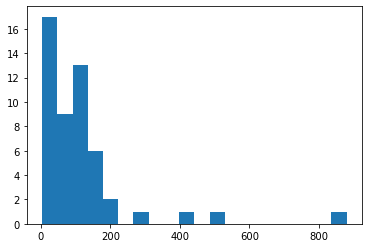

In [43]:
# Plot the number of incidents by state
import matplotlib.pyplot as plt

plt.hist(state_inc, bins = 20)

plt.show()

#### California has the highes number of police shootings witth 814 incidents. Texas, Florida, Arizona, Georgia Colorado are the follwoing top 5 states with more than 200 incidents. 

In [56]:
# Import date from datetime
from datetime import date
import pandas as pd 

print(pol_shoot.index)


Index(['1/2/2015', '1/2/2015', '1/3/2015', '1/4/2015', '1/4/2015', '1/4/2015',
       '1/5/2015', '1/6/2015', '1/6/2015', '1/6/2015',
       ...
       '12/29/2020', '12/29/2020', '12/29/2020', '12/29/2020', '12/30/2020',
       '12/30/2020', '12/30/2020', '12/30/2020', '12/31/2020', '12/31/2020'],
      dtype='object', name='date', length=5728)


#### We have the 5934 police shooting cases across the United States between 2015 January to 2020 December.

In [71]:
import matplotlib.pyplot as plt

arm_type= pol_shoot['armed'].value_counts()

print(arm_type)

gun                        3277
knife                       837
unarmed                     380
toy weapon                  195
vehicle                     171
                           ... 
metal rake                    1
carjack                       1
baseball bat and bottle       1
claimed to be armed           1
pen                           1
Name: armed, Length: 95, dtype: int64


In [79]:
print(pol_shoot.armed.value_counts(normalize=True))

gun                        0.593444
knife                      0.151576
unarmed                    0.068816
toy weapon                 0.035313
vehicle                    0.030967
                             ...   
metal rake                 0.000181
carjack                    0.000181
baseball bat and bottle    0.000181
claimed to be armed        0.000181
pen                        0.000181
Name: armed, Length: 95, dtype: float64


#### In 59,3% og the cases where police used his gun the supsect was armed with a gun, and in 15,1% of the cases the suspects were carrying a knife.

In [80]:
print(pol_shoot.race.value_counts(normalize=True))

W    0.508811
B    0.264717
H    0.185039
A    0.017435
N    0.015186
O    0.008811
Name: race, dtype: float64


#### Out of 5934 police shootings over 5 years 50,8% of the suspects were white while 26,4% of them were African American and 18,5% were Hispanic.

In [83]:
print(pol_shoot.gender.value_counts(normalize=True))

M    0.955299
F    0.044701
Name: gender, dtype: float64


#### There is a great deal of disparity accsoss genders. 95,5% of the shooting cases involved males.

In [27]:
print(pol_shoot.body_camera.value_counts(normalize=True))

False    0.874284
True     0.125716
Name: body_camera, dtype: float64


#### In 87, 4% of the 5934 cases, the officers did not wear a body camera.

In [28]:
print(pol_shoot.signs_of_mental_illness.value_counts(normalize=True))   

False    0.766262
True     0.233738
Name: signs_of_mental_illness, dtype: float64


#### In 23,3% of the cases the individuals involved in the cases had signs of mental ilness.